# Working on Completness & Purity

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCRCatalogs import GCRQuery
import numpy as np
from matplotlib.patches import Rectangle
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.io import ascii
import sys
import os
import shutil
import pickle
import healpy as hp
import h5py
import pandas as pd
%load_ext autoreload
%autoreload 0
###clevar
import clevar
from clevar import ClCatalog
from clevar.match import ProximityMatch
from clevar.match_metrics import scaling
from clevar.match_metrics import recovery
from clevar.match_metrics import distances
from clevar.match import get_matched_pairs
from clevar.match import output_matched_catalog

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
outpath = '/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/outfiles/membermatching/'
#plotspath = '/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/plots/amico_plots/'
c1 = ClCatalog.read_full(outpath + 'c1.fits') #cosmoDC2_small matched table
c2 = ClCatalog.read_full(outpath + 'c2.fits') #amico matched table
mt1, mt2 = get_matched_pairs(c1, c2, 'cross')
c_merged = ClCatalog.read(outpath +'output_catalog.fits', 'merged', full = True)

    * ClEvar used in matching: 0.13.8
    * ClEvar used in matching: 0.13.8


In [51]:
import sys
sys.path.append('/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/py_functions/')
from completness import *
from purity import *

In [52]:
x_bins = np.linspace(0.2,1.2,10)
mbins = [10**13,10**13.5,10**14,10**14.5,10**15]
compl_testf = completness_func1D(c_merged, c1, x_bins, mbins, x_param = 'z')

0
1
2
3


In [53]:
nbins_x = 9
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
     bin_x[ix] = 0.5 * (x_bins[ix] + x_bins[ix+1])

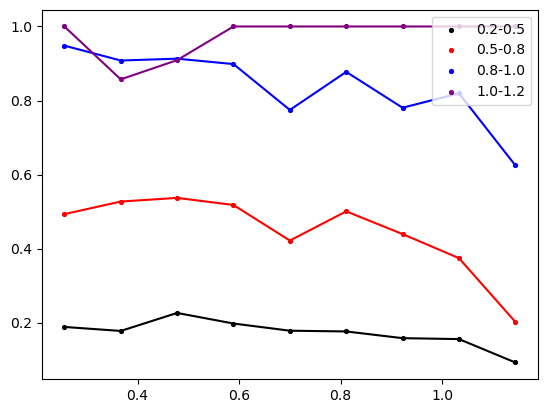

In [57]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4): 
    plt.scatter(bin_x, compl_testf[i], label=labels[i], color=colors[i], marker= ".", s=30)
    plt.plot(bin_x, compl_testf[i], color=colors[i])
plt.legend(loc = 'upper right')

In [58]:
x_bins2 = np.linspace(0.2,1.2,16)
y_bins2 = (np.logspace(13,15,20))
compl_testf2d = completness_func2D(c_merged, c1, x_bins2, y_bins2)

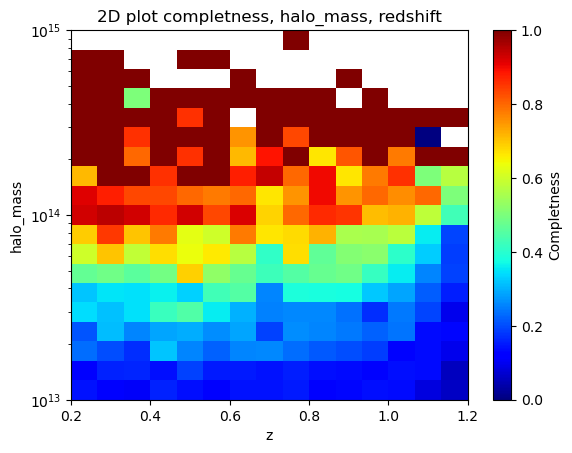

In [59]:
x, y = np.meshgrid(x_bins2, y_bins2)
fig, ax = plt.subplots()
#print(x)
#print(y)
c = ax.pcolormesh(x, y, compl_testf2d.T, cmap='jet', vmin=0, vmax=1)
ax.set_xlim(0.2,1.2)
ax.set_ylim(10**13,10**15)
ax.set_xlabel('z')
ax.set_ylabel('halo_mass')
ax.set_yscale('log')
ax.set_title('2D plot completness, halo_mass, redshift')
fig.colorbar(c, ax=ax, label = 'Completness')
#plt.savefig(plotspath+'2D_comp_plot.png', bbox_inches='tight')

In [60]:
from purity import *
zbins = [0.2,0.5,0.8,1.0,1.15]

In [73]:
x_binsp = np.linspace(1.5,4.5,5)
y_binsp = np.linspace(1,5,10)

In [74]:
purity_t = purity_func1D(c_merged, c2, x_binsp, zbins, 'z')

0
1
2
3


In [75]:
nbins_xp = 4
bin_xp = np.empty([nbins_xp])
for ix in range(nbins_xp):
     bin_xp[ix] = 0.5 * (x_binsp[ix] + x_binsp[ix+1])

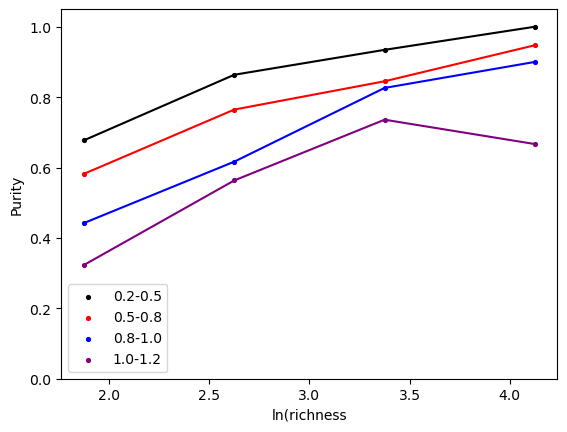

In [76]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4):
    plt.scatter(bin_xp, purity_t[i], label = labels[i], color = colors[i], marker='.',s =30)
    plt.plot(bin_xp, purity_t[i], color = colors[i])
plt.xlabel('ln(richness)')
plt.ylabel('Purity')
plt.ylim([0,1.05])
plt.legend()

In [67]:
x_binsp = np.linspace(0.2,1.2,15)
y_binsp = np.linspace(1,5,10)

In [25]:
richbins = [1.5,2.0,2.5,3.0,3.5,4.0,4.5]

In [26]:
purity_t = purity_func1D(c_merged, cam, x_binsp, richbins, 'richness')

0
1
2
3
4
5


In [27]:
nbins_xp = 14
bin_xp = np.empty([nbins_xp])
for ix in range(nbins_xp):
     bin_xp[ix] = 0.5 * (x_binsp[ix] + x_binsp[ix+1])

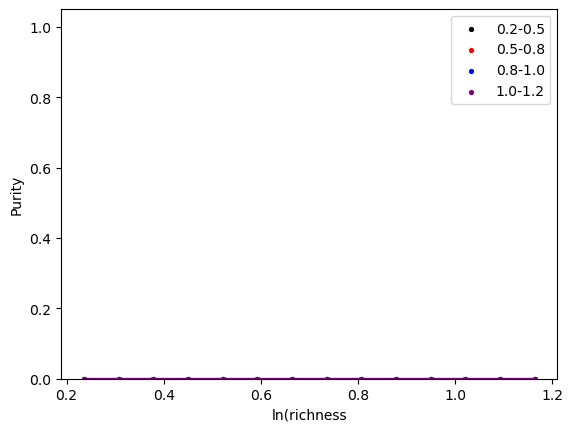

In [28]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4):
    plt.scatter(bin_xp, purity_t[i], label = labels[i], color = colors[i], marker='.',s =30)
    plt.plot(bin_xp, purity_t[i], color = colors[i])
plt.xlabel('ln(richness')
plt.ylabel('Purity')
plt.ylim([0,1.05])
plt.legend()

In [29]:
purity_t

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.0

In [10]:
c_merged['cat2_richness']

5.0672007
7.645927
16.124489
10.162095
11.228148
13.814509
9.6270456
3.7061486
5.2135811
8.1951914
12.687956
